In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #statistical graphics for data visualization
import matplotlib.pyplot as plt #create a wide range of static, animated, and interactive plots
from matplotlib.colors import LinearSegmentedColormap, ListedColormap #can make custom palettes
import matplotlib.ticker as ticker #edit ticks

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/powerlifting-database/meets.csv
/kaggle/input/powerlifting-database/openpowerlifting.csv


In [2]:
#block warnings 
import warnings
warnings.filterwarnings("ignore")

#import data
df = pd.read_csv("/kaggle/input/powerlifting-database/openpowerlifting.csv")

#investigate data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386414 entries, 0 to 386413
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   MeetID          386414 non-null  int64  
 1   Name            386414 non-null  object 
 2   Sex             386414 non-null  object 
 3   Equipment       386414 non-null  object 
 4   Age             147147 non-null  float64
 5   Division        370571 non-null  object 
 6   BodyweightKg    384012 non-null  float64
 7   WeightClassKg   382602 non-null  object 
 8   Squat4Kg        1243 non-null    float64
 9   BestSquatKg     298071 non-null  float64
 10  Bench4Kg        1962 non-null    float64
 11  BestBenchKg     356364 non-null  float64
 12  Deadlift4Kg     2800 non-null    float64
 13  BestDeadliftKg  317847 non-null  float64
 14  TotalKg         363237 non-null  float64
 15  Place           385322 non-null  object 
 16  Wilks           362194 non-null  float64
dtypes: float64

In [3]:
#sneakpeak 
df.head(10)

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1,108.29
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47
5,0,Courtney Norris,F,Wraps,28.0,Open Senior,62.41,67.5,-183.7,170.10,NaN,77.11,NaN,145.15,392.36,1,424.40
6,0,Maureen Clary,F,Raw,60.0,Mst 60-64,67.31,67.5,NaN,124.74,NaN,95.25,NaN,163.29,383.28,1,391.98
7,0,Maureen Clary,F,Raw,60.0,Open Senior,67.31,67.5,NaN,124.74,NaN,95.25,NaN,163.29,383.28,1,391.98
8,0,Priscilla Sweat Pardue,F,Wraps,52.0,50-54,65.95,67.5,NaN,120.20,NaN,54.43,NaN,108.86,283.49,1,294.25
9,0,Priscilla Sweat Pardue,F,Raw,52.0,Senior,65.95,67.5,NaN,NaN,NaN,NaN,NaN,108.86,108.86,1,112.99


In [4]:
#remove unwanted columns 
df = df.drop(['Equipment', 'Squat4Kg','Bench4Kg',
              'Deadlift4Kg'], axis=1)
 
#convert inf to nan through whole session
df.replace([np.inf, -np.inf], np.nan, inplace=True) 
  
#remove rows with nan values 
df.dropna(inplace=True) 

#convert kg to freedom units (lbs) 
df["Weight (lbs)"] = df["BodyweightKg"] * 2.205 
df["Max Squat (lbs)"] = df["BestSquatKg"] * 2.205
df["Max Deadlift (lbs)"] = df["BestDeadliftKg"] * 2.205
df["Max Bench (lbs)"] = df["BestBenchKg"] * 2.205
df["Total Weight Lifted (lbs)"] = df["TotalKg"] * 2.205
df['Wilks'] = df['Wilks'] * 2.205

#rename wilks group 
df.rename(columns={'Wilks': 'Wilks-adjusted Total Weight Lifted (lbs)'}, inplace=True)

In [5]:
## Statistics
df.describe()

,MeetID,Age,BodyweightKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,Wilks-adjusted Total Weight Lifted (lbs),Weight (lbs),Max Squat (lbs),Max Deadlift (lbs),Max Bench (lbs),Total Weight Lifted (lbs)
count,96753.000000,96753.000000,96753.000000,96753.000000,96753.000000,96753.000000,96753.000000,96753.000000,96753.000000,96753.000000,96753.000000,96753.000000,96753.000000
mean,6177.523570,29.907662,85.437754,178.114959,116.519434,200.693824,495.327302,791.281060,188.390247,392.743485,442.529882,256.925351,1092.196702
std,2694.930559,11.946710,22.861869,67.955158,50.112710,61.695801,173.603837,169.209022,50.410422,149.841123,136.039242,110.498526,382.796461
min,0.000000,7.000000,24.100000,13.600000,6.800000,12.000000,38.600000,62.247150,53.140500,29.988000,26.460000,14.994000,85.113000
25%,5717.000000,21.500000,67.800000,124.740000,72.500000,149.690000,347.500000,679.448700,149.499000,275.051700,330.066450,159.862500,766.237500
50%,7312.000000,26.000000,82.070000,175.000000,115.000000,202.500000,498.950000,787.162950,180.964350,385.875000,446.512500,253.575000,1100.184750
75%,7977.000000,36.000000,98.970000,222.500000,150.000000,247.500000,617.500000,896.575050,218.228850,490.612500,545.737500,330.750000,1361.587500
max,8462.000000,93.000000,230.800000,548.850000,442.250000,440.000000,1363.050000,1718.532900,508.914000,1210.214250,970.200000,975.161250,3005.525250


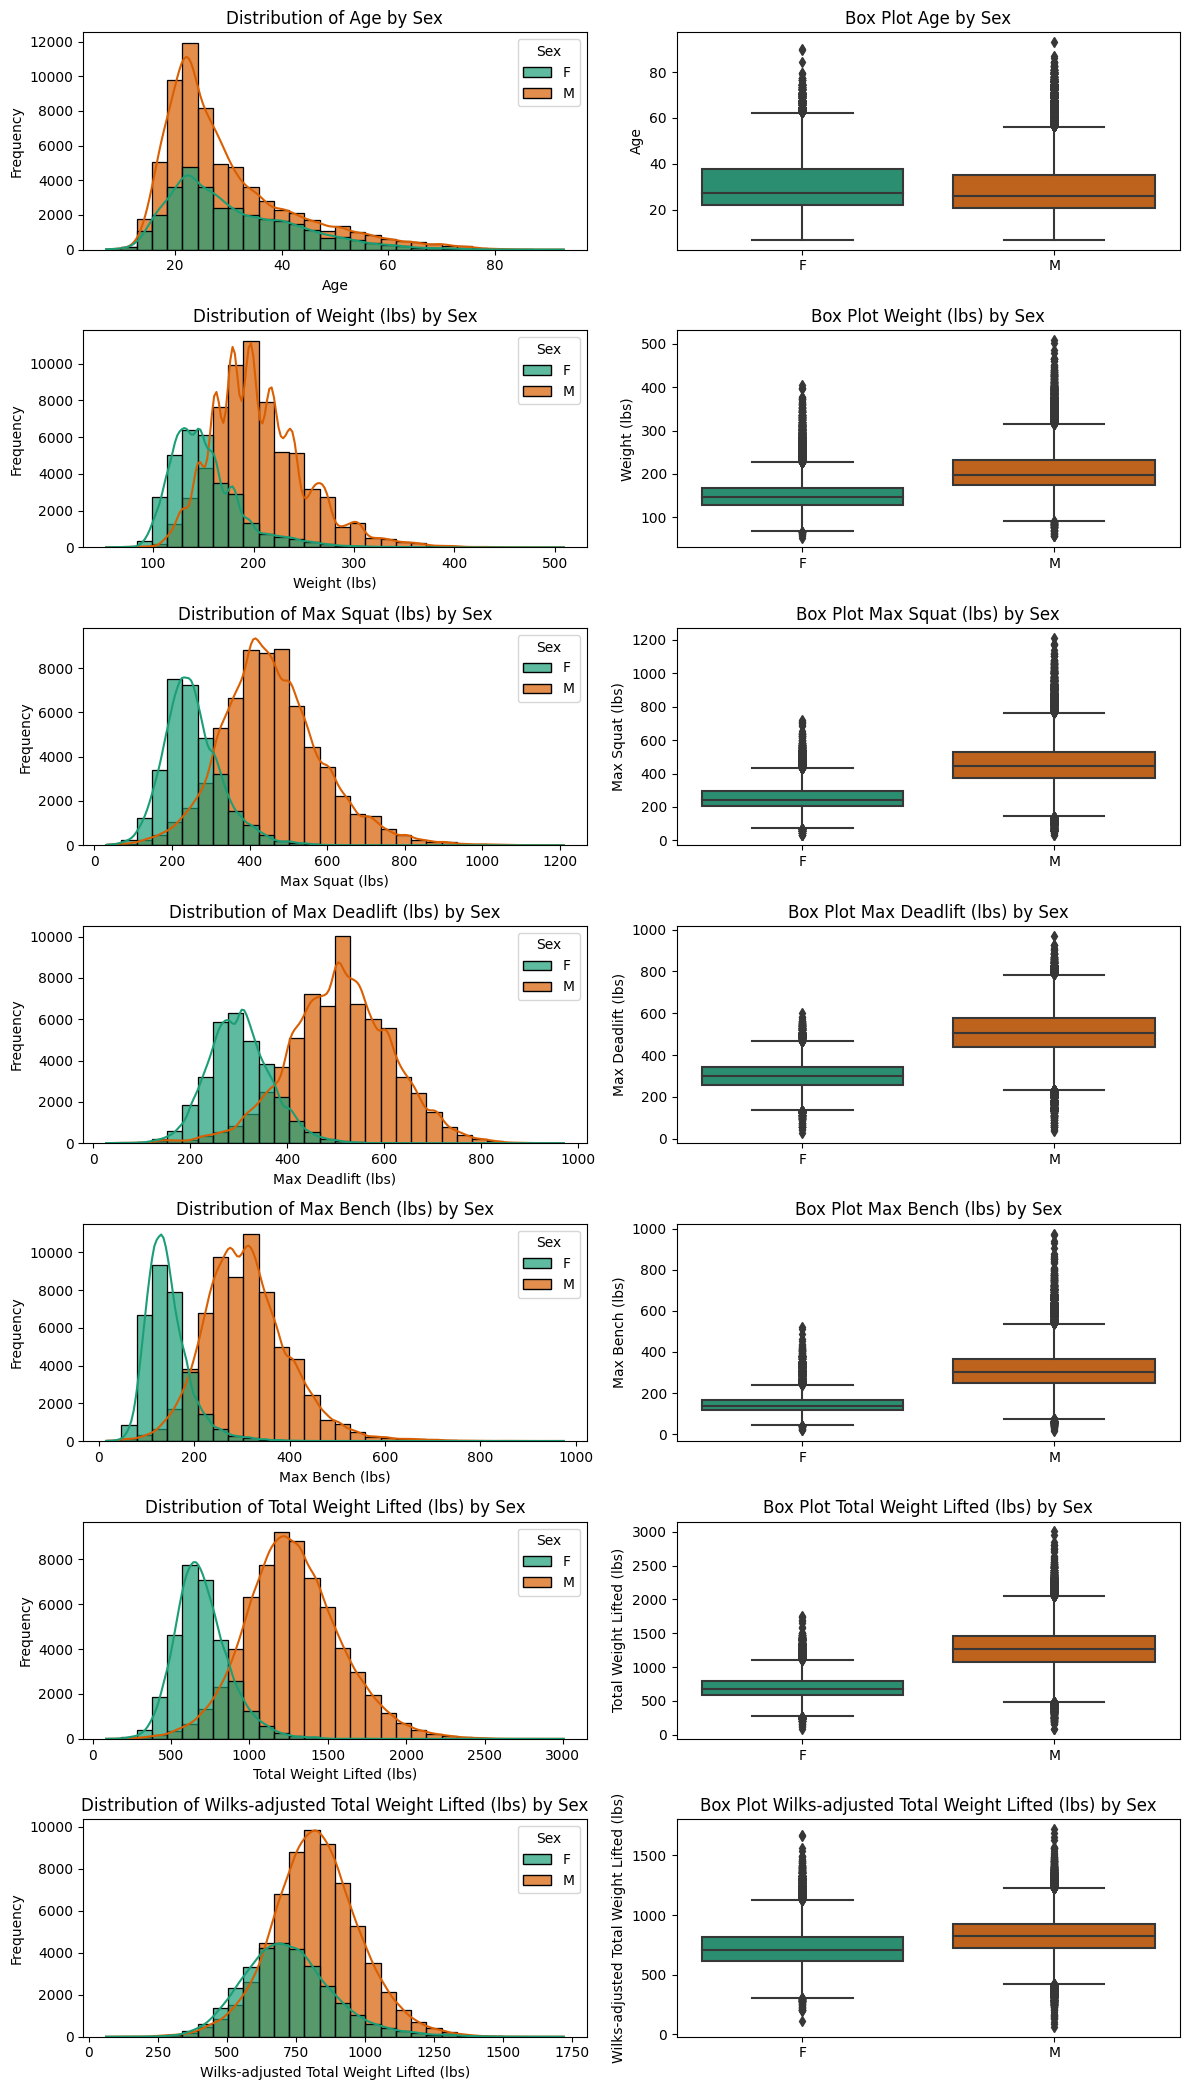

In [6]:
#distribution of age and weight by sex
columns_to_plot = ['Age','Weight (lbs)', 'Max Squat (lbs)', 'Max Deadlift (lbs)','Max Bench (lbs)', 'Total Weight Lifted (lbs)', 'Wilks-adjusted Total Weight Lifted (lbs)']

fig, axes = plt.subplots(len(columns_to_plot), 2, figsize=(12, len(columns_to_plot) * 3))

for i, column in enumerate(columns_to_plot):
    sns.histplot(data=df, x=column, hue='Sex',
             ax=axes[i][0], palette = 'Dark2', 
             kde=True, bins=30, alpha=0.7, edgecolor= 'black')
    axes[i][0].set_title(f'Distribution of {column} by Sex')
    axes[i][0].set_xlabel(column)
    axes[i][0].set_ylabel('Frequency')

    sns.boxplot(data=df, x='Sex', y=column, ax=axes[i][1], 
                palette = 'Dark2')
    axes[i][1].set_title(f'Box Plot {column} by Sex')
    axes[i][1].set_xlabel('')
    axes[i][1].set_ylabel(f'{column}')

plt.tight_layout()  

plt.show()

In [7]:
#remove kg columns & meetid
df2 = df.drop(['MeetID','BodyweightKg','BestSquatKg', 'BestDeadliftKg', 'BestBenchKg', 'TotalKg'], axis =1)

#Separate numerical columns 
num_cols = df2.select_dtypes(include='number').columns.tolist()
cat_cols = df2.select_dtypes(exclude='number').columns.tolist()

print ("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)


Numerical Columns: ['Age', 'Wilks-adjusted Total Weight Lifted (lbs)', 'Weight (lbs)', 'Max Squat (lbs)', 'Max Deadlift (lbs)', 'Max Bench (lbs)', 'Total Weight Lifted (lbs)']
Categorical Columns: ['Name', 'Sex', 'Division', 'WeightClassKg', 'Place']


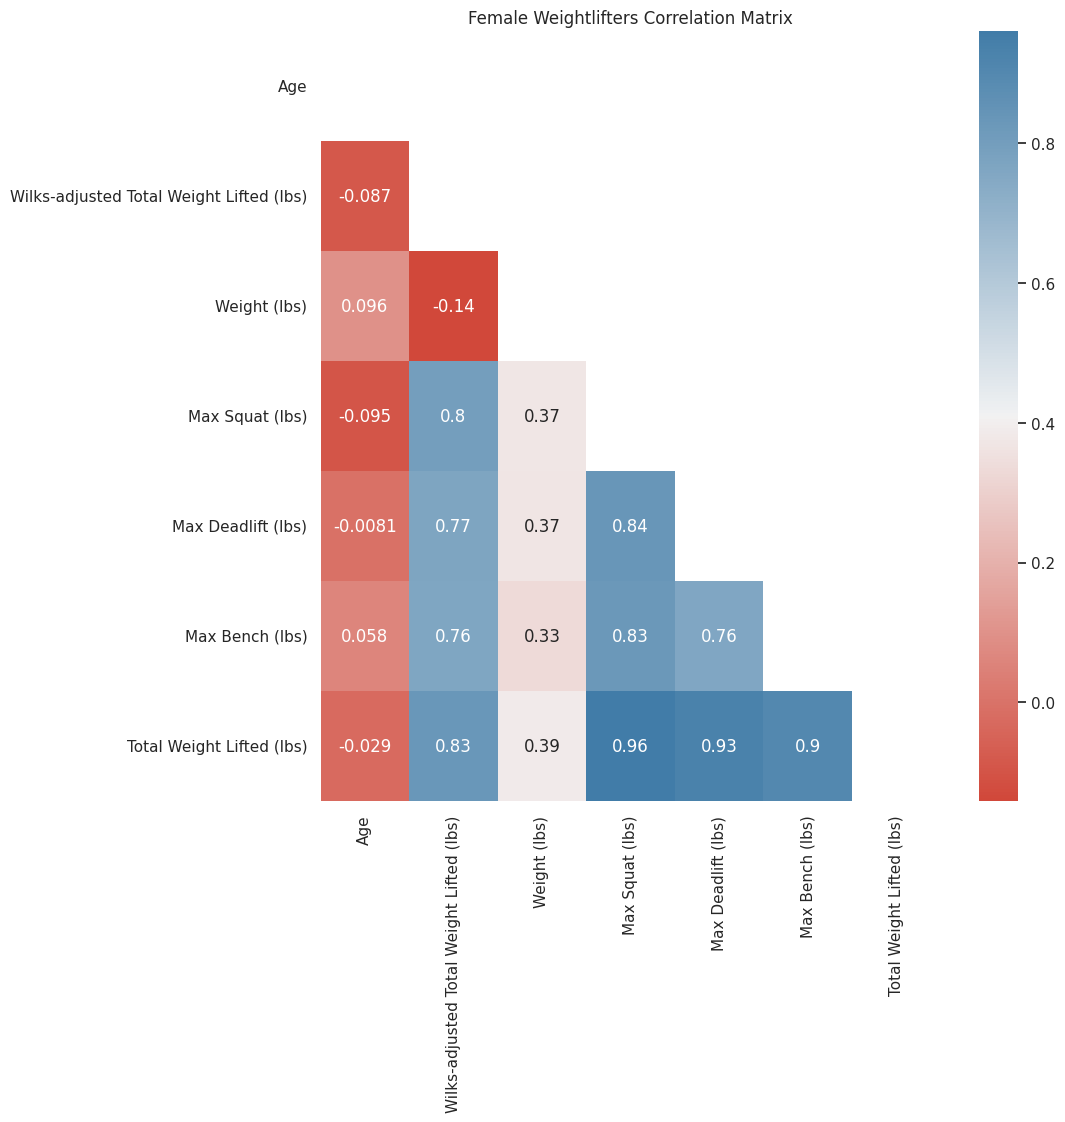

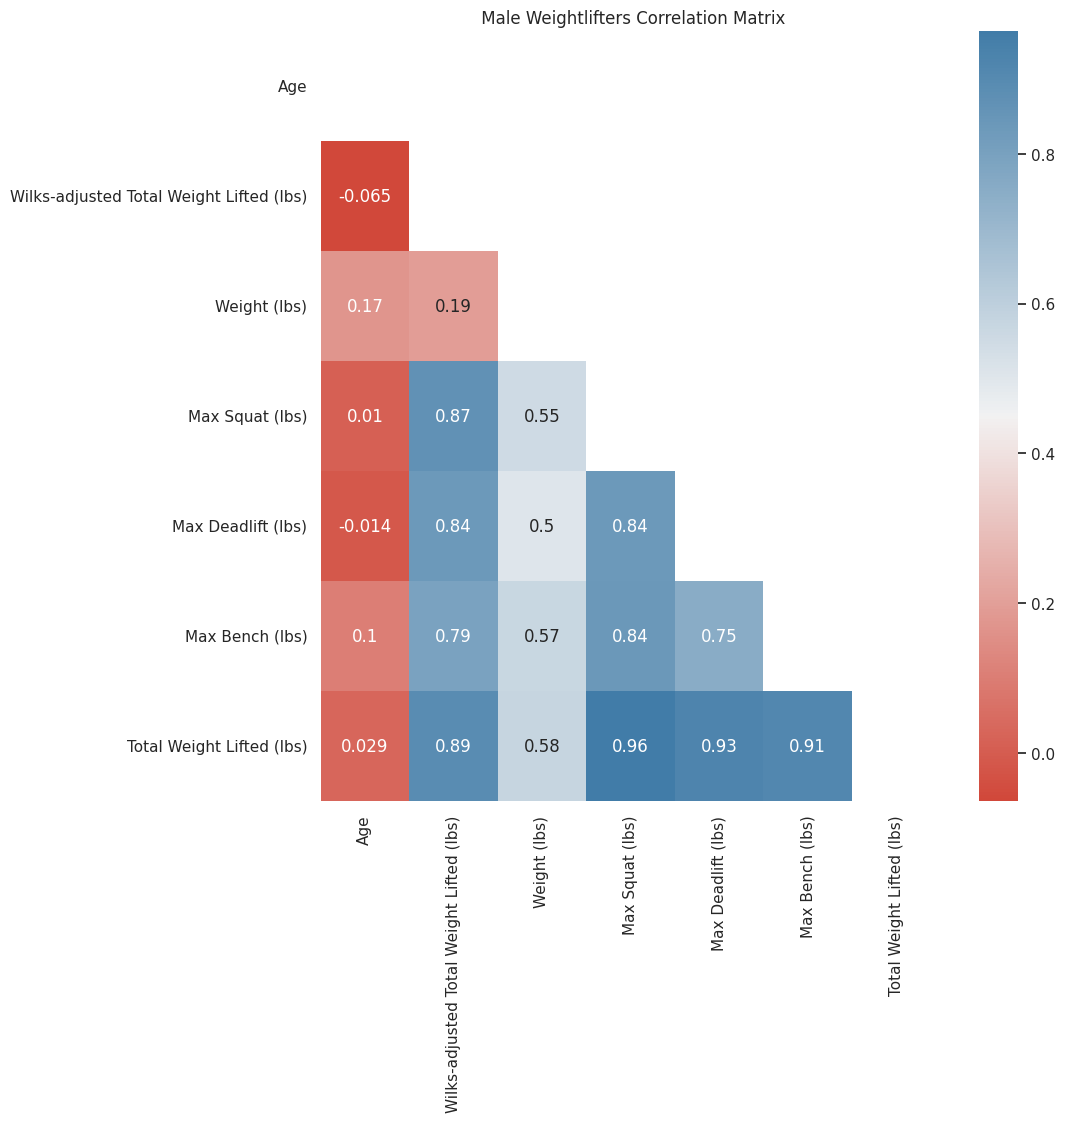

In [8]:
#First let's separate female and male weightlifters
female_df = df2[(df2.Sex =='F')]
male_df = df2[(df2.Sex =='M')]

#custom color map - 0 = red, 1 = blue
cmap = sns.diverging_palette(15, 600, as_cmap=True)

#white background
sns.set_theme(style="white")



corr_matrix_f = female_df[num_cols].corr() #Calculate & display correlation matrix for females
mask_f = np.triu(np.ones_like(corr_matrix_f, dtype=bool)) #create mask to remove repeat comparisons
corr_matrix_m = male_df[num_cols].corr() #Calculate & display correlation matrix for males
mask_m = np.triu(np.ones_like(corr_matrix_m, dtype=bool))

f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix_f, mask=mask_f, annot=True, cmap = cmap) 
plt.title("Female Weightlifters Correlation Matrix")
plt.show()


f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix_m, mask=mask_m, annot=True, cmap = cmap)
plt.title(" Male Weightlifters Correlation Matrix")

plt.show()

Place
1     52219
2     17111
3      8669
4      5167
5      3375
      ...  
73        2
74        2
75        2
76        1
77        1
Name: count, Length: 79, dtype: int64
Place
1.0    52219
2.0    17111
3.0     8669
Name: count, dtype: int64


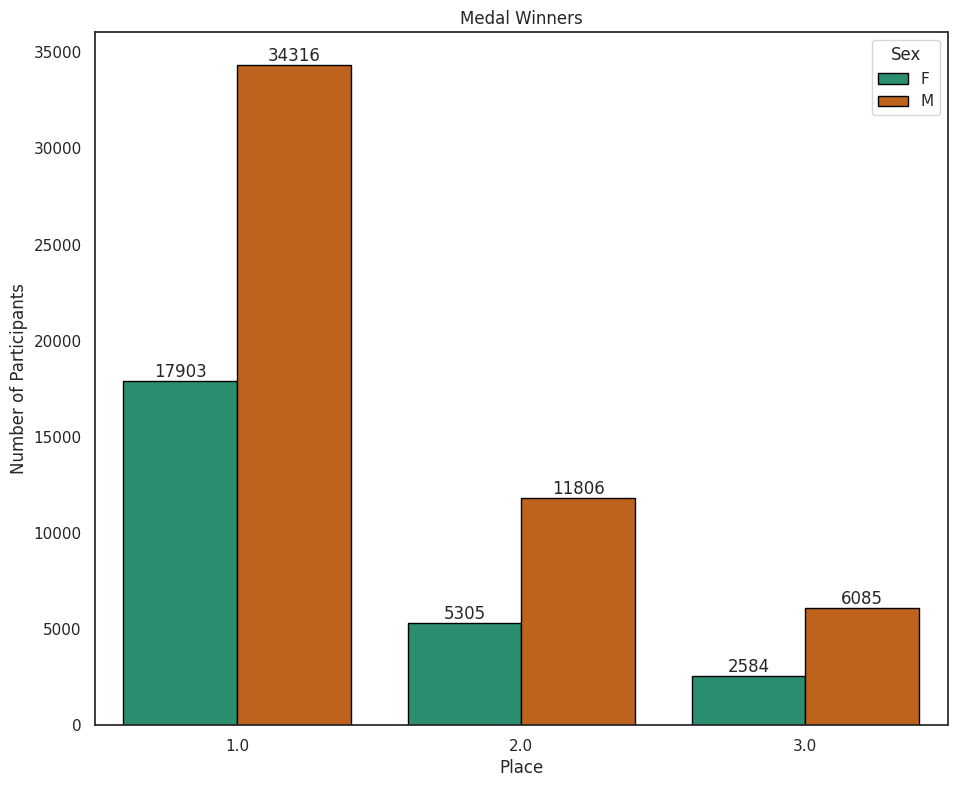

In [9]:
#Not moving forward with the age aspect because the there is no correlation between age and any other categories so I will not move forward with that analysis

#What are the possible positions that people can win? 
place_count = df['Place'].value_counts()
print(place_count)

#That's a lot of positions so let's filter for top 3 positions

#convert place values to numbers
df['Place'] = pd.to_numeric(df['Place'], downcast='integer', errors='coerce')

#Filter for 1st, 2nd, & 3rd place
top = df[(df.Place <= 3)]
top_count= top['Place'].value_counts()
print(top_count)

f, ax = plt.subplots(figsize=(11, 9))
sns.countplot(top, x="Place", hue ='Sex', palette = 'Dark2', edgecolor='black')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Medal Winners')
plt.ylabel('Number of Participants')



plt.show()

In [10]:
#These results show that there are alot more men than women that compete in these compeitions, lets see how much more 

female = int((len(df[df['Sex']=='F'])/len(df))*100)
print('The composition of weightlifting participants is',female,'percent females and', (100-female),'percent male.')

The composition of weightlifting participants is 32 percent females and 68 percent male.


In [11]:
meets = pd.read_csv("/kaggle/input/powerlifting-database/meets.csv")

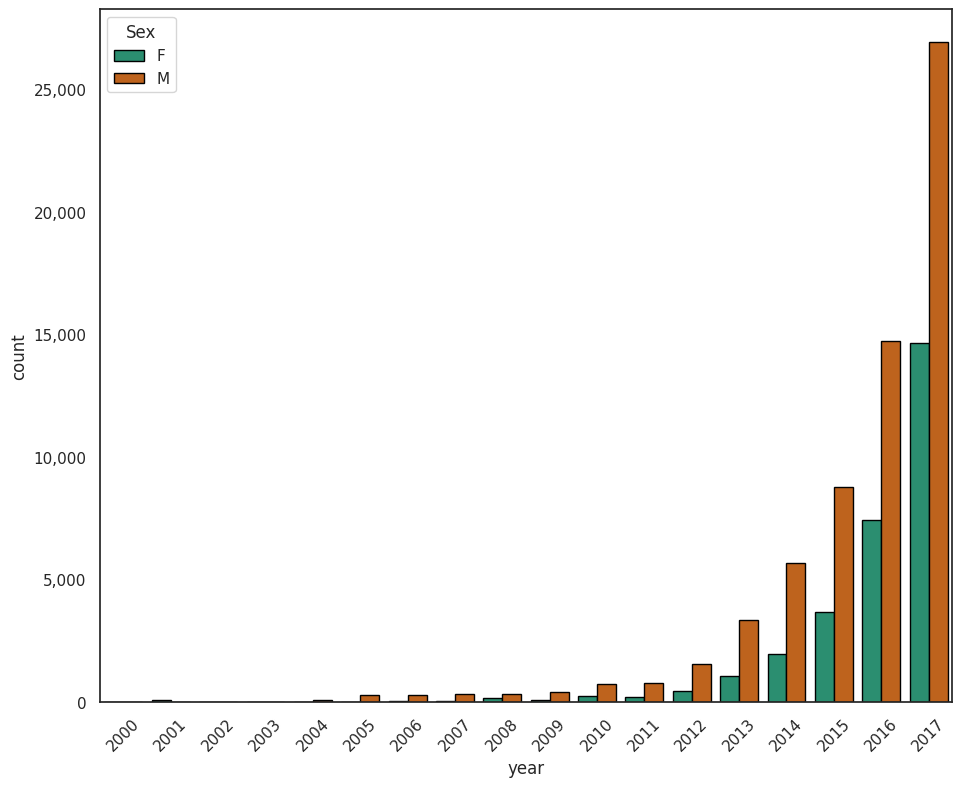

In [12]:
#timeseries
meets['Date'] = pd.to_datetime(meets['Date']) #need to convert date column to datetimes
meets['year'] = meets['Date'].dt.year

merged = pd.merge(meets, df, on='MeetID', how='left')

merged = merged[merged['year'] != 2018]#remove 2018 since it has not been a full year and this will skew the dats

#Need to futher filter the data because women weren't included in competitions until ~1998 -____- 

f, ax = plt.subplots(figsize=(11, 9))
filtered_merge = merged[merged['year'] >= 2000] 
sns.countplot(data=filtered_merge, x='year', hue='Sex', palette = 'Dark2', edgecolor = 'black')
plt.xticks(rotation=45)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


plt.show()


##in progress, need convet to line chart and pull out analysis for each sex 